# Time Series

In [ ]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [10]:
dataset = pd.read_csv('AirPassengers.csv')

In [11]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
dataset = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [12]:
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
dataset.shape

(144, 1)

In [16]:
time_series = dataset['#Passengers']

In [17]:
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [18]:
time_series[1]

118

In [19]:
time_series['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [20]:
time_series[datetime(1949,2,1)]

118

In [21]:
time_series['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [22]:
time_series[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [23]:
time_series['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [24]:
time_series.index.max()

Timestamp('1960-12-01 00:00:00')

In [25]:
time_series.index.min()

Timestamp('1949-01-01 00:00:00')

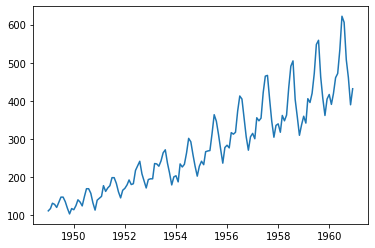

In [26]:
plt.plot(time_series)

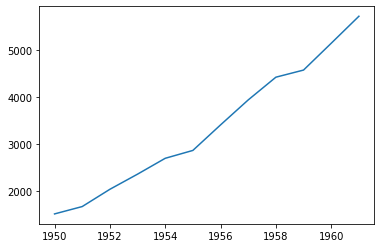

In [27]:
time_series_year = time_series.resample('A').sum()
plt.plot(time_series_year)

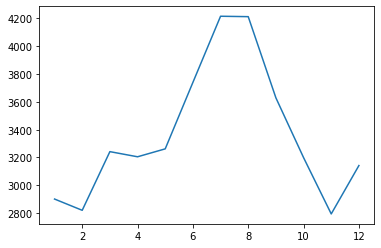

In [28]:
time_series_month = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_month)

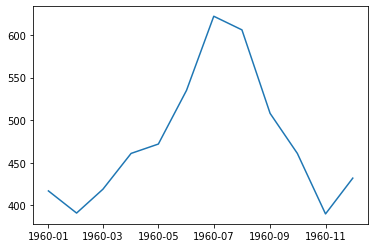

In [29]:
time_series_dates = time_series['1960-01-01':'1960-12-01']
plt.plot(time_series_dates)

# Temporal Decomposition

In [32]:
decomposition = seasonal_decompose(time_series)
trend = decomposition.trend
seasonal = decomposition.seasonal
random = decomposition.resid

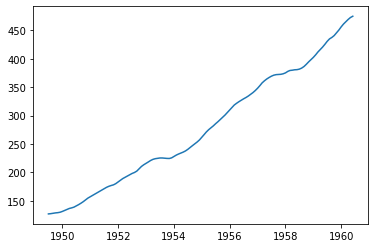

In [33]:
plt.plot(trend)

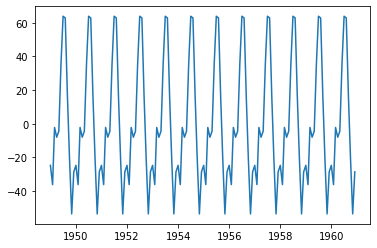

In [34]:
plt.plot(seasonal)

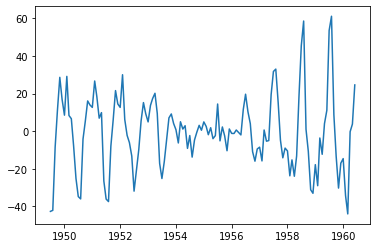

In [35]:
plt.plot(random)

# Arima Predictions

In [36]:
# P, Q and D parameters
model = auto_arima(time_series)

In [37]:
model.order

(4, 1, 3)

In [38]:
predictions = model.predict(n_periods=24)

In [39]:
predictions

array([467.57401654, 490.49500228, 509.1373897 , 492.55512361,
       495.30611115, 475.94779765, 476.33978849, 475.55210622,
       472.35391134, 483.88982165, 475.57040329, 485.92175018,
       479.13379925, 480.98759619, 482.22151092, 476.21115582,
       483.94293393, 475.84749094, 482.79441626, 479.01210197,
       479.51880696, 482.44959227, 476.97410358, 483.51116704])

# Predictions Graph

In [40]:
len(time_series)

144

In [41]:
train = time_series[:130]
train.shape

(130,)

In [42]:
train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [43]:
test = time_series[130:]
test.shape

(14,)

In [44]:
test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [45]:
model2 = auto_arima(train, suppress_warnings=True)

In [46]:
test.index

DatetimeIndex(['1959-11-01', '1959-12-01', '1960-01-01', '1960-02-01',
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [47]:
prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['passengers_predictions']
prediction

,passengers_predictions
Month,
1959-11-01,357.690517
1959-12-01,334.857459
1960-01-01,342.488602
1960-02-01,375.944537
1960-03-01,424.126289
1960-04-01,473.151441
1960-05-01,510.388373
1960-06-01,527.724236
1960-07-01,523.268325


In [48]:
test

Month
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

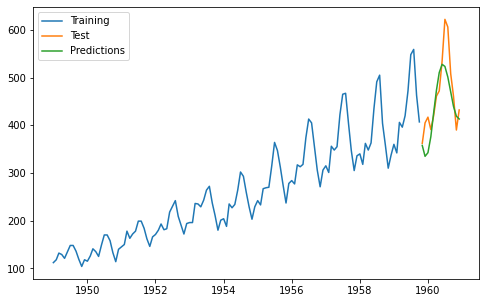

In [49]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predictions')
plt.legend();

# Facebook Prophet

In [ ]:
!pip install fbprophet

In [51]:
from fbprophet import Prophet
import pandas as pd

In [53]:
dataset = pd.read_csv('page_wikipedia.csv')
dataset

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [54]:
dataset.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


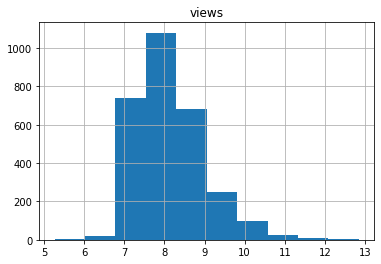

In [55]:
dataset.hist();

In [56]:
dataset = dataset[['date', 'views']].rename(columns = {'date': 'ds', 'views': 'y'}) # Tool Requirement
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [57]:
dataset = dataset.sort_values(by = 'ds')
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [58]:
model = Prophet()
model.fit(dataset)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

In [60]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.040603,8.241008,9.460298,8.040603,8.040603,0.803055,0.803055,0.803055,0.352293,0.352293,0.352293,0.450762,0.450762,0.450762,0.0,0.0,0.0,8.843657
1,2007-12-11,8.039061,7.978435,9.218040,8.039061,8.039061,0.553139,0.553139,0.553139,0.119645,0.119645,0.119645,0.433495,0.433495,0.433495,0.0,0.0,0.0,8.592200
2,2007-12-12,8.037518,7.726949,8.985103,8.037518,8.037518,0.350502,0.350502,0.350502,-0.066660,-0.066660,-0.066660,0.417162,0.417162,0.417162,0.0,0.0,0.0,8.388020
3,2007-12-13,8.035976,7.731718,8.965844,8.035976,8.035976,0.329951,0.329951,0.329951,-0.072258,-0.072258,-0.072258,0.402209,0.402209,0.402209,0.0,0.0,0.0,8.365927
4,2007-12-14,8.034434,7.728176,8.981245,8.034434,8.034434,0.319465,0.319465,0.319465,-0.069577,-0.069577,-0.069577,0.389042,0.389042,0.389042,0.0,0.0,0.0,8.353899


In [61]:
len(dataset), len(forecast)

(2905, 2995)

In [62]:
len(forecast) - len(dataset)

90

In [63]:
forecast.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2905,2016-01-21,7.555356,7.910278,9.152863,7.555356,7.555356,0.999964,0.999964,0.999964,-0.072258,-0.072258,-0.072258,1.072222,1.072222,1.072222,0.0,0.0,0.0,8.555319
2906,2016-01-22,7.554321,7.998709,9.218976,7.554321,7.554321,1.016945,1.016945,1.016945,-0.069577,-0.069577,-0.069577,1.086522,1.086522,1.086522,0.0,0.0,0.0,8.571266
2907,2016-01-23,7.553286,7.711509,8.953671,7.553286,7.553286,0.786647,0.786647,0.786647,-0.311718,-0.311718,-0.311718,1.098365,1.098365,1.098365,0.0,0.0,0.0,8.339933
2908,2016-01-24,7.552251,8.103160,9.361438,7.552251,7.552251,1.155631,1.155631,1.155631,0.048276,0.048276,0.048276,1.107355,1.107355,1.107355,0.0,0.0,0.0,8.707882
2909,2016-01-25,7.551216,8.398965,9.642570,7.551216,7.551216,1.465374,1.465374,1.465374,0.352293,0.352293,0.352293,1.113081,1.113081,1.113081,0.0,0.0,0.0,9.016590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.467387,6.290363,7.545609,7.436667,7.496418,-0.560917,-0.560917,-0.560917,-0.069577,-0.069577,-0.069577,-0.491340,-0.491340,-0.491340,0.0,0.0,0.0,6.906470
2991,2016-04-16,7.466352,6.027748,7.391326,7.435059,7.496062,-0.772972,-0.772972,-0.772972,-0.311718,-0.311718,-0.311718,-0.461254,-0.461254,-0.461254,0.0,0.0,0.0,6.693380
2992,2016-04-17,7.465317,6.458369,7.688040,7.433549,7.495610,-0.383291,-0.383291,-0.383291,0.048276,0.048276,0.048276,-0.431567,-0.431567,-0.431567,0.0,0.0,0.0,7.082026
2993,2016-04-18,7.464282,6.788627,8.065946,7.432008,7.494968,-0.050726,-0.050726,-0.050726,0.352293,0.352293,0.352293,-0.403019,-0.403019,-0.403019,0.0,0.0,0.0,7.413556


# Prediction Graphs

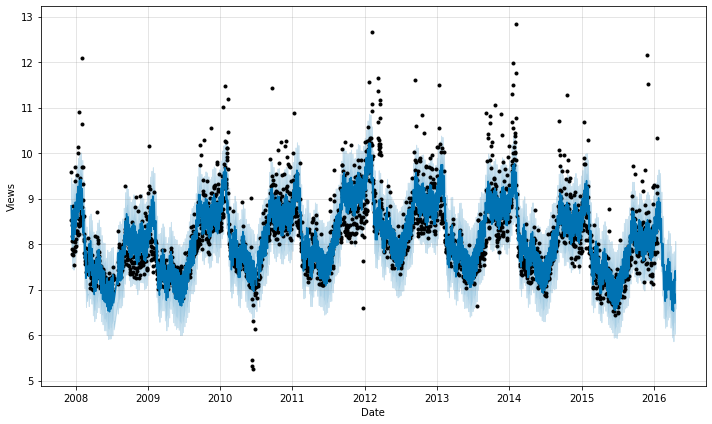

In [64]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Views');

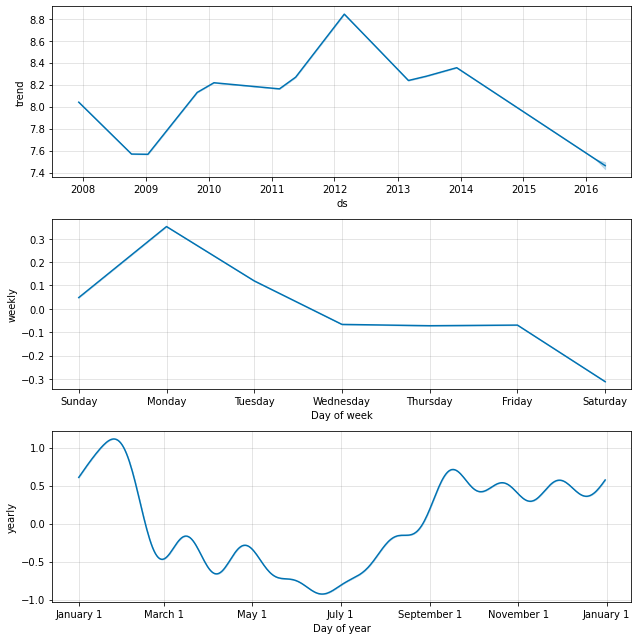

In [65]:
model.plot_components(forecast);

In [66]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [67]:
plot_plotly(model, forecast)

In [68]:
plot_components_plotly(model, forecast)